In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, fixed

In [2]:
def Prandle_Heaps(t, z, N):
    
        #Coast Characteristics
      
    zeta = 0.2    
    h = 25
    k = 0.0025
    f = 1.09083078 * 10**-4
    w = 1.4 * 10**-4
    g = 9.81
    drho_dx = - 2 * 10**-4
    rho = 1000
    w = 1.4 * 10**-4
    U = 0.43
    s = (8 * k * U) / (3 * np.pi * N)
    
        #Heaps
        
    D = np.pi * ((2 * N)/ f)**0.5
    Z = z + zeta
    H = h + zeta
    eta = Z / H
    a = np.pi * H / D
    a1 = a * (1 - eta)
    a2 = a * eta
    b = k * (H / N)
    C = a * (np.sinh(a) * np.cos(a) - np.cosh(a) * np.sin(a)) + b * np.cosh(a) * np.cos(a)
    E = a * (np.sinh(a) * np.cos(a) + np.cosh(a) * np.sin(a)) + b * np.sinh(a) * np.sin(a)
    L = b * np.cosh(a2) * np.cos(a2)
    M = b * np.sinh(a2) * np.sin(a2)
    P = C / (C**2 + E**2)
    Q = E / (C**2 + E**2)
    R = P * np.cosh(a) * np.cos(a) + Q * np.sinh(a) * np.sin(a)
    S = 1 - (R * b)
    Delta = (R - P - S) / S
    Lambda = 1 + b + b * Delta
    X = np.cosh(a1) * np.cos(a1) + (b / (2 * a)) * (np.sinh(a1) * np.cos(a1) + np.cosh(a1) * np.sin(a1)) - Lambda * np.cosh(a2) * np.cos(a2)
    Y = np.sinh(a1) * np.sin(a1) + (b / (2 * a)) * (np.cosh(a1) * np.sin(a1) - np.sinh(a1) * np.cos(a1)) - Lambda * np.sinh(a2) * np.sin(a2)
    
    u_h = ((g * H) / f) * (X * Q - Y * P) * (drho_dx) / rho
    v_h = ((g * H) / f) * (X * P + Y * Q + Delta + eta) * (drho_dx) / rho  
    
    u_h = np.flip(u_h)
    v_h = np.flip(v_h)
    
        #Prandle
    
    a_plus = (1 + complex(0, 1)) * cmath.sqrt((f + w) / (2 * N))
    R_plus = np.cosh(a_plus * (z - h)) - np.cosh(a_plus * h) - (a_plus / s) * np.sinh(a_plus * h) 
    R_plus_avg =  - np.cosh(a_plus * h) + (1 / (a_plus * h) - (a_plus / s)) * np.sinh(a_plus * h)

    a_min = (1 + complex(0, 1)) * cmath.sqrt((f - w) / (2 * N))
    R_min = np.cosh(a_min * (z - h)) - np.cosh(a_min * h) - (a_min / s) * np.sinh(a_min * h) 
    R_min_avg =  - np.cosh(a_min * h) + (1 / (a_min * h) - (a_min / s)) * np.sinh(a_min * h)

    R_plus_plot = R_plus / R_plus_avg
    R_min_plot = R_min / R_min_avg 
    
    R_plus_amp = np.sqrt(R_plus_plot.real**2 + R_plus_plot.imag**2) * U
    R_min_amp = np.sqrt(R_min_plot.real**2 + R_min_plot.imag**2) * U

    R_plus_time = R_plus_amp * np.exp(-complex(0, 1) * w * t) 
    R_min_time = R_min_amp * np.exp(complex(0, 1) * w * t)
    R = R_plus_time + R_min_time
    
    u_p = R.imag
    v_p = R.real
    
        #Prandle + Heaps
    
    u = u_h + u_p
    v = v_h + v_p
    
        #Plot
    
    x = np.zeros(len(z))
    y = np.zeros(len(z))
    
    fig = plt.figure(figsize=(20, 20))  
    ax11 = fig.add_subplot(131, projection='3d')
    ax12 = fig.add_subplot(132, projection='3d')
    ax13 = fig.add_subplot(133, projection='3d')

    ax11.quiver(x, y, z, u_p, v_p, 0, label='Prandle')
    ax11.axis(xmin=-.3, xmax=.3)
    ax11.axis(ymin=-1, ymax=1)
    ax11.set_xlabel('Cross-shore velocity [m/s]')
    ax11.set_ylabel('Alongshore velocity [m/s]')
    ax11.legend(loc='upper left')
    
    ax12.quiver(x, y, z, u_h, v_h, 0, label='Heaps')    
    ax12.axis(xmin=-.3, xmax=.3)
    ax12.axis(ymin=-1, ymax=1)
    ax12.set_xlabel('Cross-shore velocity [m/s]')
    ax12.set_ylabel('Alongshore velocity [m/s]')
    ax12.legend(loc='upper left')
    
    ax13.quiver(x, y, z, u, v, 0, label='Prandle + Heaps') 
    ax13.axis(xmin=-.3, xmax=.3)
    ax13.axis(ymin=-1, ymax=1)
    ax13.set_xlabel('Cross-shore velocity [m/s]')
    ax13.set_ylabel('Alongshore velocity [m/s]')
    ax13.legend(loc='upper left')

In [3]:
z = np.linspace(0, 25, 100)
N = 0.0028
t = np.linspace(0, 89400, 100)
interact(Prandle_Heaps, t=(0, 89400, 89400/100), z=fixed(z), N=fixed(N))

interactive(children=(FloatSlider(value=44700.0, description='t', max=89400.0, step=894.0), Output()), _dom_cl…

<function __main__.Prandle_Heaps(t, z, N)>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


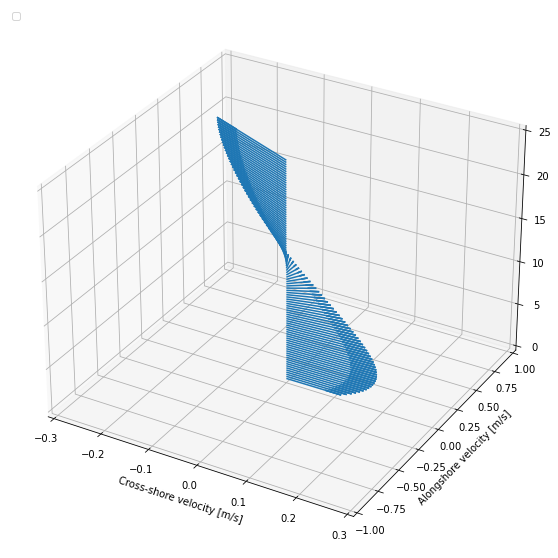

In [4]:
    #Coast Characteristics
z = np.linspace(0, 25, 100)
N = 0.0028
t = 44700/4

zeta = 0.2    
h = 25
k = 0.0025
f = 1.09083078 * 10**-4
w = 1.4 * 10**-4
g = 9.81
drho_dx = - 2 * 10**-4
rho = 1000
w = 1.4 * 10**-4
U = 0.43
s = (8 * k * U) / (3 * np.pi * N)

    #Heaps

D = np.pi * ((2 * N)/ f)**0.5
Z = z + zeta
H = h + zeta
eta = Z / H
a = np.pi * H / D
a1 = a * (1 - eta)
a2 = a * eta
b = k * (H / N)
C = a * (np.sinh(a) * np.cos(a) - np.cosh(a) * np.sin(a)) + b * np.cosh(a) * np.cos(a)
E = a * (np.sinh(a) * np.cos(a) + np.cosh(a) * np.sin(a)) + b * np.sinh(a) * np.sin(a)
L = b * np.cosh(a2) * np.cos(a2)
M = b * np.sinh(a2) * np.sin(a2)
P = C / (C**2 + E**2)
Q = E / (C**2 + E**2)
R = P * np.cosh(a) * np.cos(a) + Q * np.sinh(a) * np.sin(a)
S = 1 - (R * b)
Delta = (R - P - S) / S
Lambda = 1 + b + b * Delta
X = np.cosh(a1) * np.cos(a1) + (b / (2 * a)) * (np.sinh(a1) * np.cos(a1) + np.cosh(a1) * np.sin(a1)) - Lambda * np.cosh(a2) * np.cos(a2)
Y = np.sinh(a1) * np.sin(a1) + (b / (2 * a)) * (np.cosh(a1) * np.sin(a1) - np.sinh(a1) * np.cos(a1)) - Lambda * np.sinh(a2) * np.sin(a2)

u_h = ((g * H) / f) * (X * Q - Y * P) * (drho_dx) / rho
v_h = ((g * H) / f) * (X * P + Y * Q + Delta + eta) * (drho_dx) / rho  

u_h = np.flip(u_h)
v_h = np.flip(v_h)

    #Prandle

a_plus = (1 + complex(0, 1)) * cmath.sqrt((f + w) / (2 * N))
R_plus = np.cosh(a_plus * (z - h)) - np.cosh(a_plus * h) - (a_plus / s) * np.sinh(a_plus * h) 
R_plus_avg =  - np.cosh(a_plus * h) + (1 / (a_plus * h) - (a_plus / s)) * np.sinh(a_plus * h)

a_min = (1 + complex(0, 1)) * cmath.sqrt((f - w) / (2 * N))
R_min = np.cosh(a_min * (z - h)) - np.cosh(a_min * h) - (a_min / s) * np.sinh(a_min * h) 
R_min_avg =  - np.cosh(a_min * h) + (1 / (a_min * h) - (a_min / s)) * np.sinh(a_min * h)

R_plus_plot = R_plus / R_plus_avg
R_min_plot = R_min / R_min_avg 

R_plus_amp = np.sqrt(R_plus_plot.real**2 + R_plus_plot.imag**2) * U
R_min_amp = np.sqrt(R_min_plot.real**2 + R_min_plot.imag**2) * U

R_plus_time = R_plus_amp * np.exp(complex(0, 1) * w * t) 
R_min_time = R_min_amp * np.exp(- complex(0, 1) * w * t)
R = R_plus_time + R_min_time

u_p = R.imag
v_p = R.real

    #Prandle + Heaps

u = u_h + u_p
v = v_h + v_p

    #Plot

x = np.zeros(len(z))
y = np.zeros(len(z))

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(projection='3d')

ax.quiver(x, y, z, u, v, 0) 
ax.axis(xmin=-.3, xmax=.3)
ax.axis(ymin=-1, ymax=1)
ax.set_xlabel('Cross-shore velocity [m/s]')
ax.set_ylabel('Alongshore velocity [m/s]')
ax.legend(loc='upper left')
plt.savefig('Prandle Heaps 3D t=0.25T.png', bbox_inches='tight', dpi=150)